# **Effect of dropout ratio in performance**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
x_train = np.linspace(0,10,50)
y_train = x_train + np.random.uniform(-1,1,50)
x_test = np.linspace(0,10,10)
y_test = x_test + np.random.uniform(-1,1,10)

<Axes: >

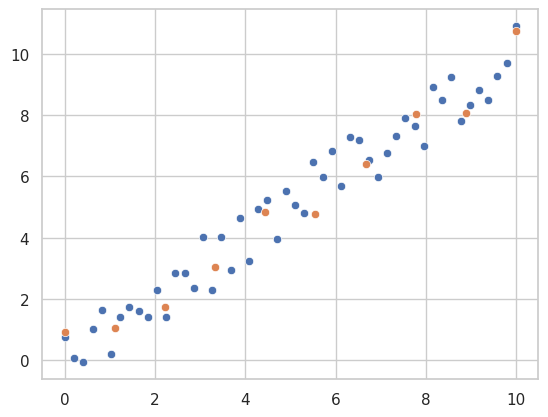

In [3]:
sns.scatterplot(x = x_train, y = y_train)
sns.scatterplot(x = x_test, y = y_test)

In [4]:
p = np.arange(0,1,0.05)

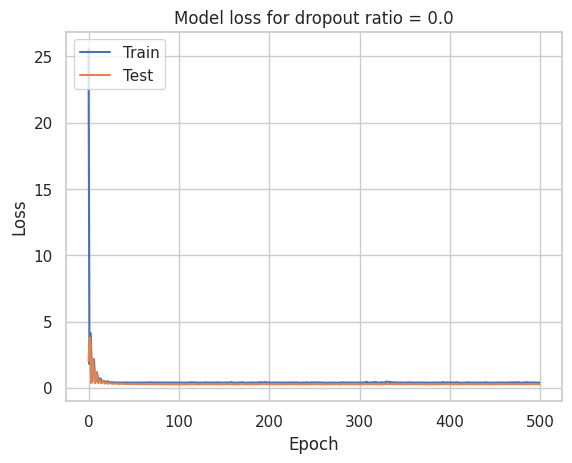

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
For dropout ratio = 0.0, R2 score is 0.9725100108933575


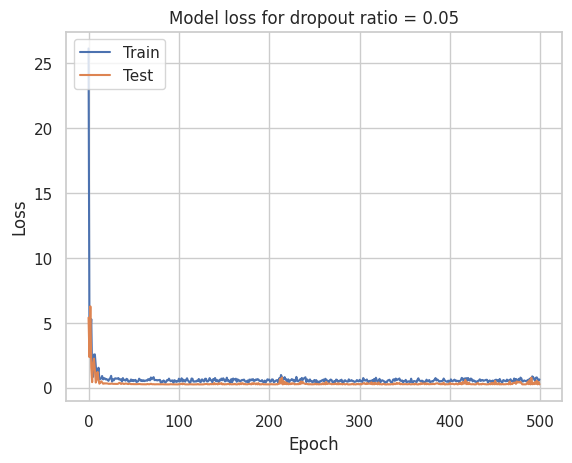

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
For dropout ratio = 0.05, R2 score is 0.9738576281083221


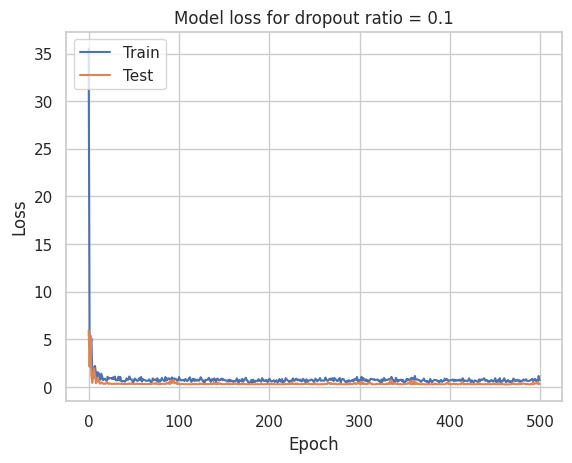

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
For dropout ratio = 0.1, R2 score is 0.9667056108826443


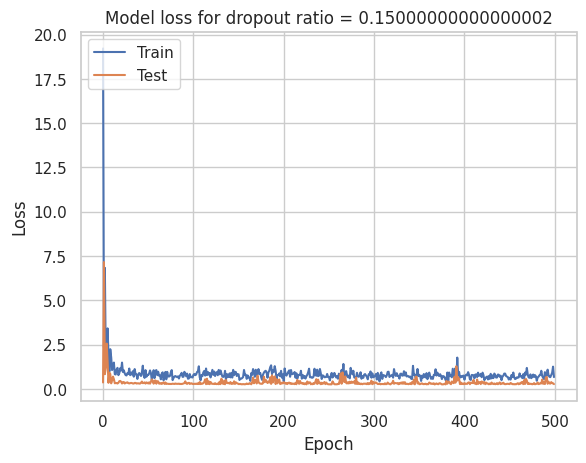

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
For dropout ratio = 0.15000000000000002, R2 score is 0.9731230616805718


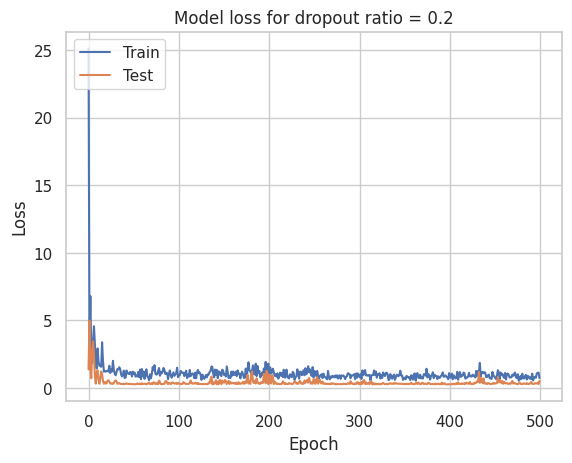

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
For dropout ratio = 0.2, R2 score is 0.9465720164265503


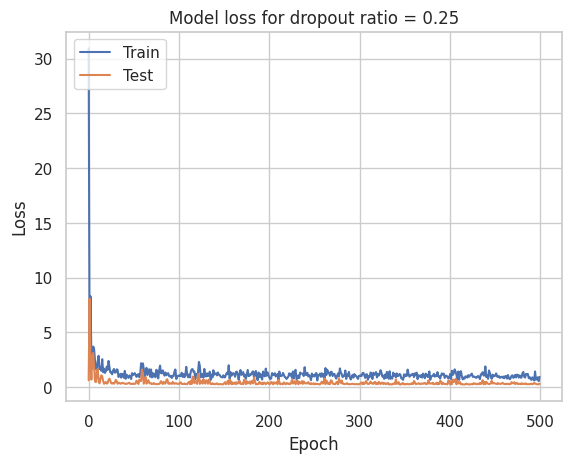

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
For dropout ratio = 0.25, R2 score is 0.9700929405763621


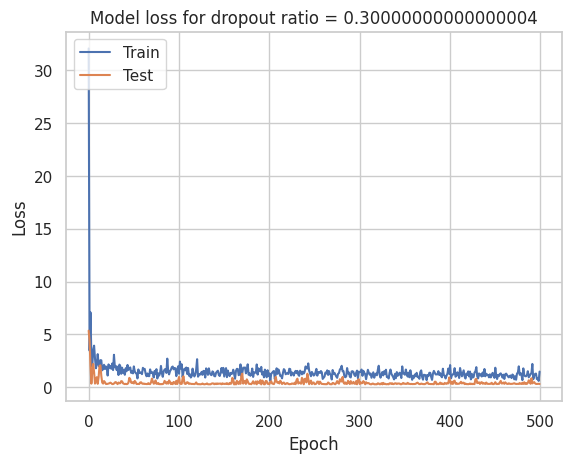

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
For dropout ratio = 0.30000000000000004, R2 score is 0.9704084867890511


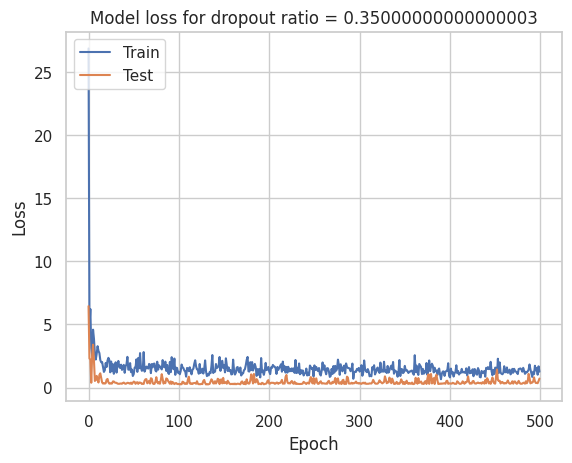

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
For dropout ratio = 0.35000000000000003, R2 score is 0.9287682300284348


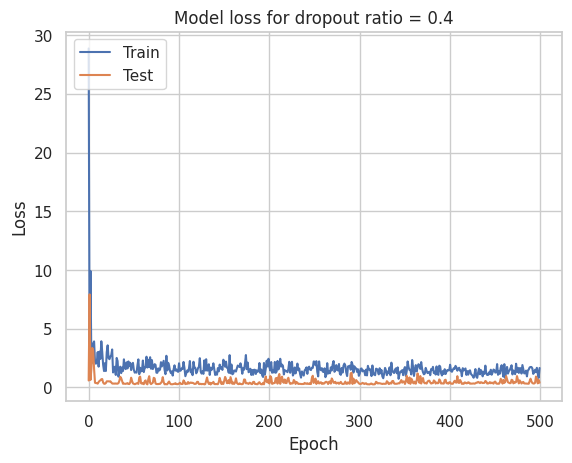

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
For dropout ratio = 0.4, R2 score is 0.9597396460866775


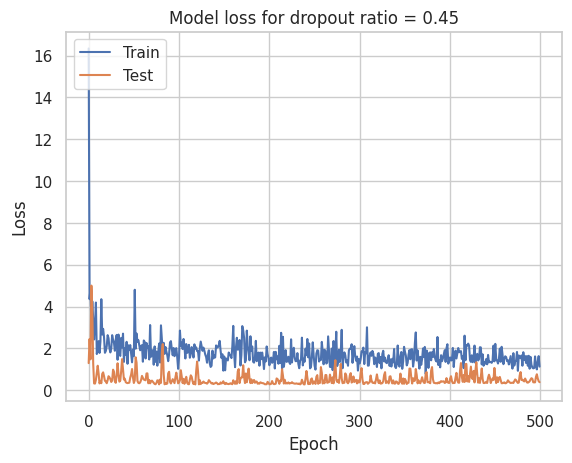

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
For dropout ratio = 0.45, R2 score is 0.9613405370926809


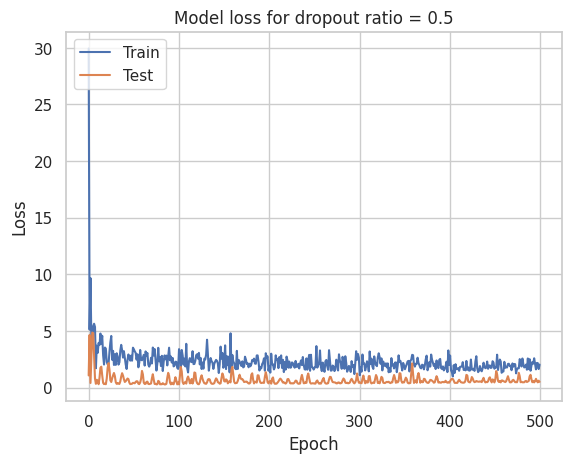

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
For dropout ratio = 0.5, R2 score is 0.9484987908664214


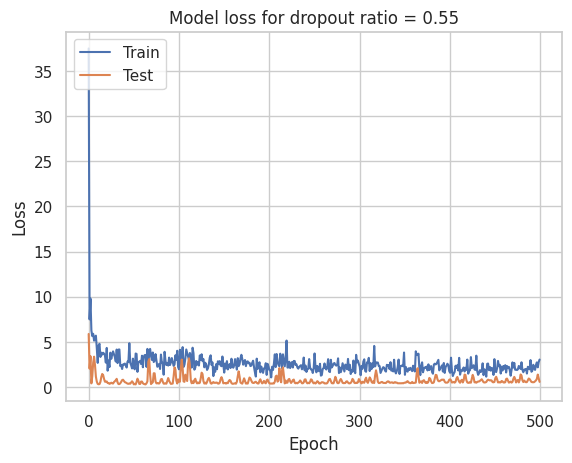

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
For dropout ratio = 0.55, R2 score is 0.9426147832279562


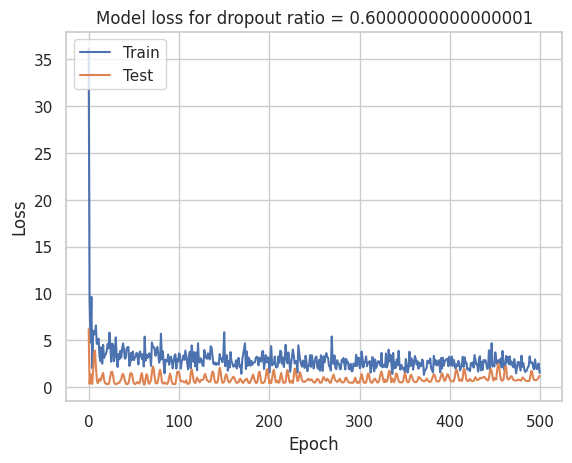

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
For dropout ratio = 0.6000000000000001, R2 score is 0.8779584166990265


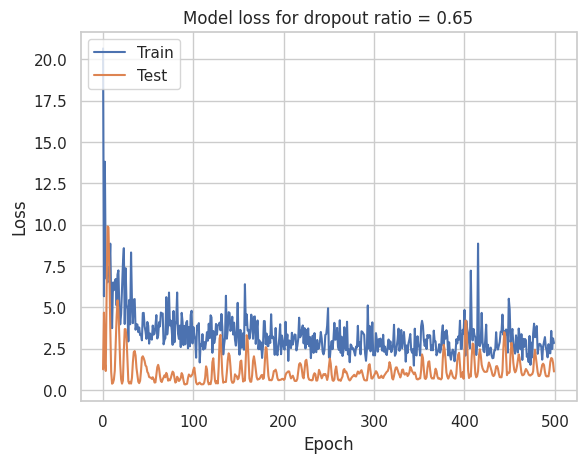

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
For dropout ratio = 0.65, R2 score is 0.8890362451336604


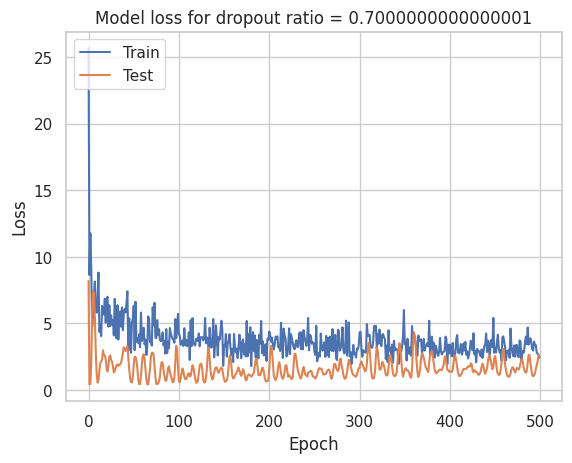

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
For dropout ratio = 0.7000000000000001, R2 score is 0.7478508157649748


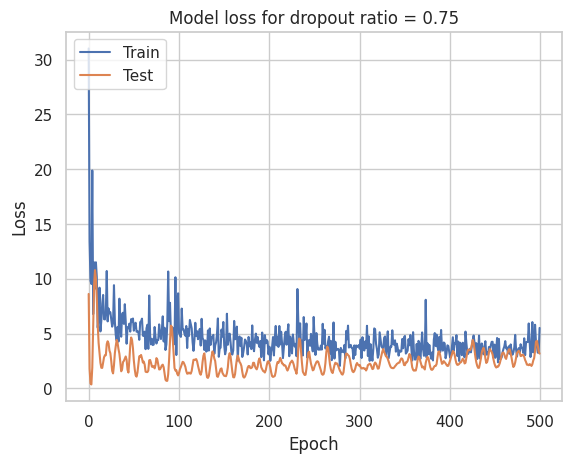

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
For dropout ratio = 0.75, R2 score is 0.6849299582766704


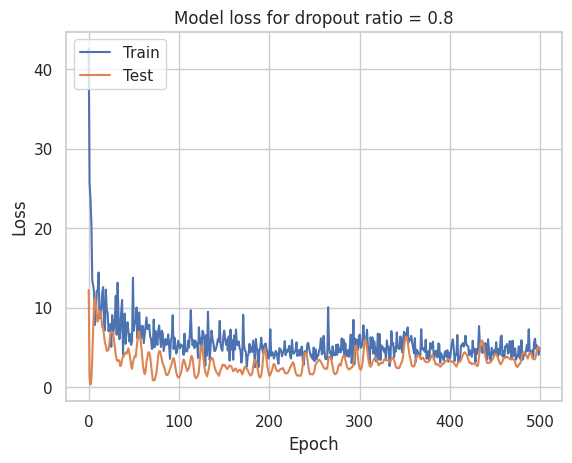

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
For dropout ratio = 0.8, R2 score is 0.5299130790161769


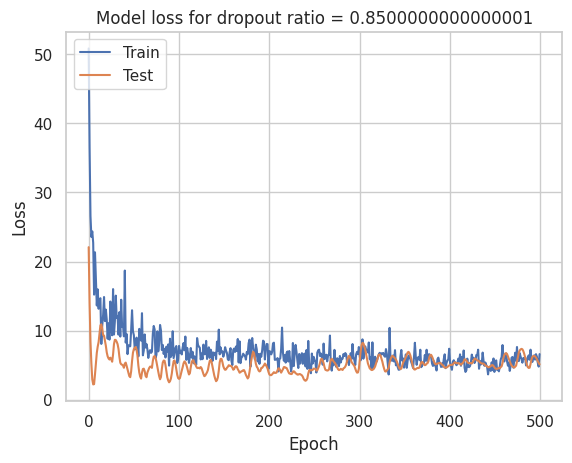

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
For dropout ratio = 0.8500000000000001, R2 score is 0.48978798433716764


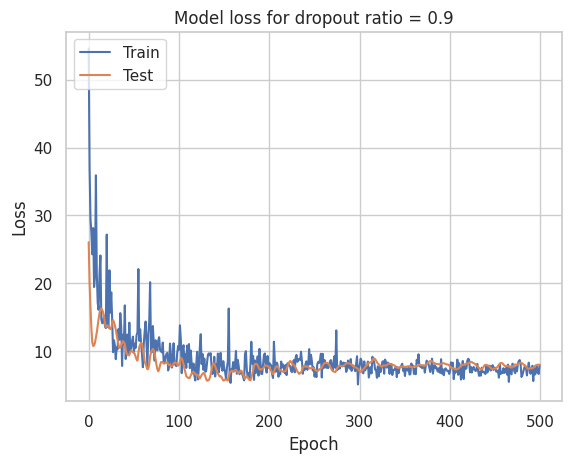

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
For dropout ratio = 0.9, R2 score is 0.19717439482472232


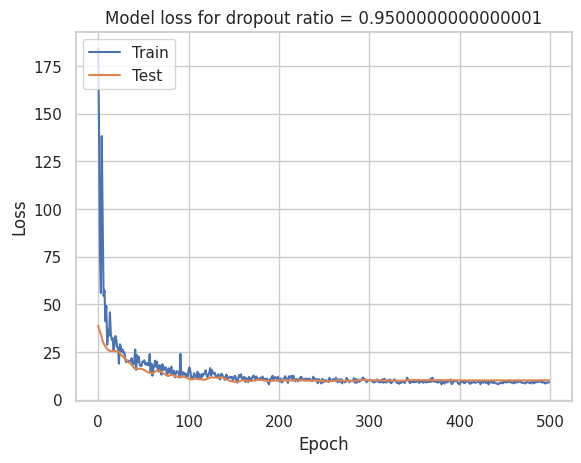

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
For dropout ratio = 0.9500000000000001, R2 score is -0.006170428203167377


In [5]:
r2_score_value = []  # Use a list to store the R2 scores
j = 0
for i in p:
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=1))
    model.add(Dropout(i))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(i))
    model.add(Dense(1, activation='linear'))

    adam = Adam(learning_rate=0.01)
    model.compile(optimizer=adam, loss='mse', metrics=['mse'])

    history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=0)

    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss for dropout ratio = {i}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Predict and calculate R2 score
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)

    r2_score_value.append(r2)  # Append the R2 score to the list
    print(f'For dropout ratio = {i}, R2 score is {r2}')
    j += 1

# Convert the list to a NumPy array if necessary
r2_score_value = np.array(r2_score_value)


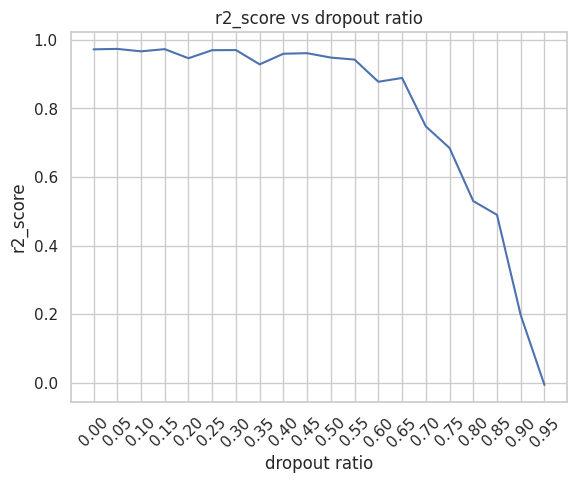

In [8]:
plt.plot(p,r2_score_value)
plt.title('r2_score vs dropout ratio')
plt.xlabel('dropout ratio')
plt.ylabel('r2_score')
plt.xticks(p)
plt.xticks(rotation = 45)
plt.show()

#### Remark: Better not to keep drop-out ratio above 0.5.